In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/feedback-prize-english-language-learning/sample_submission.csv
/kaggle/input/feedback-prize-english-language-learning/train.csv
/kaggle/input/feedback-prize-english-language-learning/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/feedback-prize-english-language-learning/train.csv")

In [3]:
test = pd.read_csv("/kaggle/input/feedback-prize-english-language-learning/test.csv")

In [4]:
test

,text_id,full_text
0,0000C359D63E,when a person has no experience on a job their...
1,000BAD50D026,Do you think students would benefit from being...
2,00367BB2546B,"Thomas Jefferson once states that ""it is wonde..."


In [5]:
train

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5
...,...,...,...,...,...,...,...,...
3906,FFD29828A873,I believe using cellphones in class for educat...,2.5,3.0,3.0,3.5,2.5,2.5
3907,FFD9A83B0849,"Working alone, students do not have to argue w...",4.0,4.0,4.0,4.0,3.5,3.0
3908,FFDC4011AC9C,"""A problem is a chance for you to do your best...",2.5,3.0,3.0,3.0,3.5,3.0
3909,FFE16D704B16,Many people disagree with Albert Schweitzer's ...,4.0,4.5,4.5,4.0,4.5,4.5


In [6]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


False

In [7]:
import nltk
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

In [8]:
import nltk
nltk.download('punkt')
  

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

In [9]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [10]:
train['full_text'] = train['full_text'].apply(lambda x:clean_text(x))
train

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,i think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,when a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,dear principalif u change the school policy of...,3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,the best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5
...,...,...,...,...,...,...,...,...
3906,FFD29828A873,i believe using cellphones in class for educat...,2.5,3.0,3.0,3.5,2.5,2.5
3907,FFD9A83B0849,working alone students do not have to argue wi...,4.0,4.0,4.0,4.0,3.5,3.0
3908,FFDC4011AC9C,a problem is a chance for you to do your best ...,2.5,3.0,3.0,3.0,3.5,3.0
3909,FFE16D704B16,many people disagree with albert schweitzers q...,4.0,4.5,4.5,4.0,4.5,4.5


In [11]:
test['full_text'] = test['full_text'].apply(lambda x:clean_text(x))
test

,text_id,full_text
0,0000C359D63E,when a person has no experience on a job their...
1,000BAD50D026,do you think students would benefit from being...
2,00367BB2546B,thomas jefferson once states that it is wonder...


In [12]:
def remove_stopword(text):
    if pd.notnull(text):
        stop_words = set(stopwords.words('english'))
        tokens = word_tokenize(text)
        filtered_text = [word for word in tokens if word not in stop_words]
        return ' '.join(filtered_text)
    return text


In [13]:
train['full_text'] = train['full_text'].apply(lambda x:remove_stopword(x))
train

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,think students would benefit learning homebeca...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,problem change let best matter happening chang...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,dear principalif u change school policy grade ...,3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,best time life become agree greatest accomplis...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,small act kindness impact people change people...,2.5,3.0,3.0,3.0,2.5,2.5
...,...,...,...,...,...,...,...,...
3906,FFD29828A873,believe using cellphones class education us go...,2.5,3.0,3.0,3.5,2.5,2.5
3907,FFD9A83B0849,working alone students argue decission proyect...,4.0,4.0,4.0,4.0,3.5,3.0
3908,FFDC4011AC9C,problem chance best think quote cant best ever...,2.5,3.0,3.0,3.0,3.5,3.0
3909,FFE16D704B16,many people disagree albert schweitzers quote ...,4.0,4.5,4.5,4.0,4.5,4.5


In [14]:
test['full_text'] = test['full_text'].apply(lambda x:remove_stopword(x))
test

,text_id,full_text
0,0000C359D63E,person experience job always going good people...
1,000BAD50D026,think students would benefit able attend class...
2,00367BB2546B,thomas jefferson states wonderful much get don...


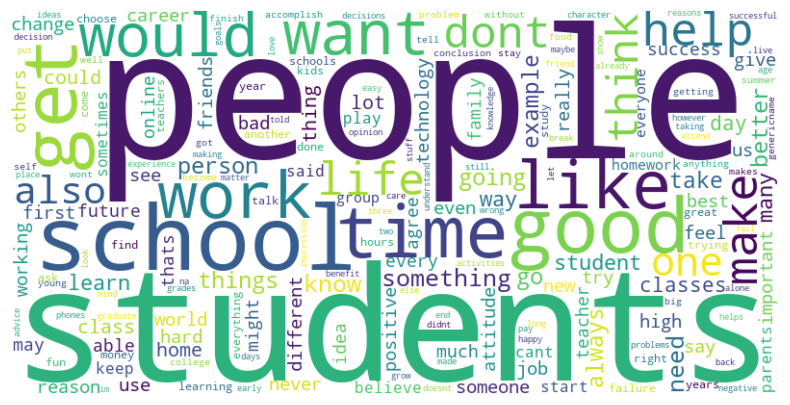

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with columns 'url' and 'text'

# Tokenize the text
tokens = word_tokenize(' '.join(train['full_text']))

# Count the occurrence of each word
word_counts = pd.Series(tokens).value_counts()

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
train.describe()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
count,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,3.127077,3.028254,3.235745,3.116850,3.032856,3.081053
std,0.662542,0.644399,0.583148,0.655997,0.699841,0.671450
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.500000,2.500000,3.000000,2.500000,2.500000,2.500000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


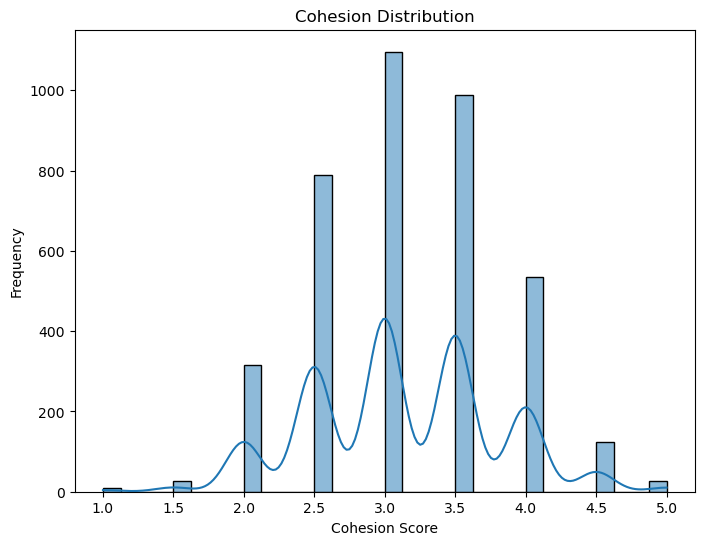

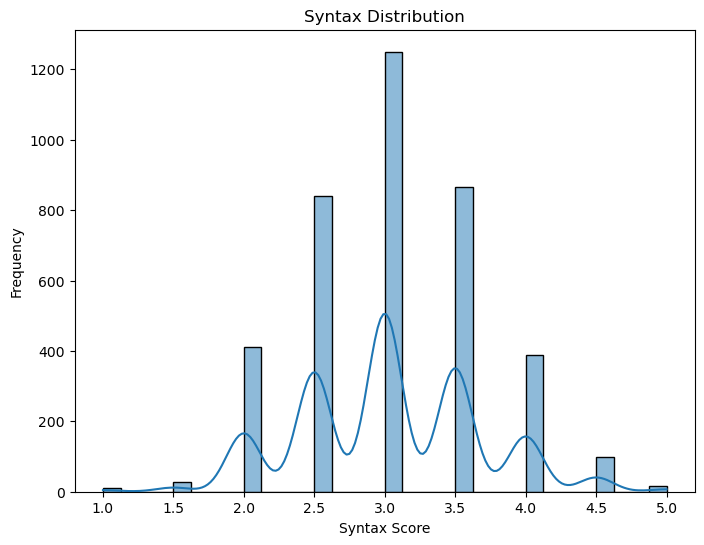

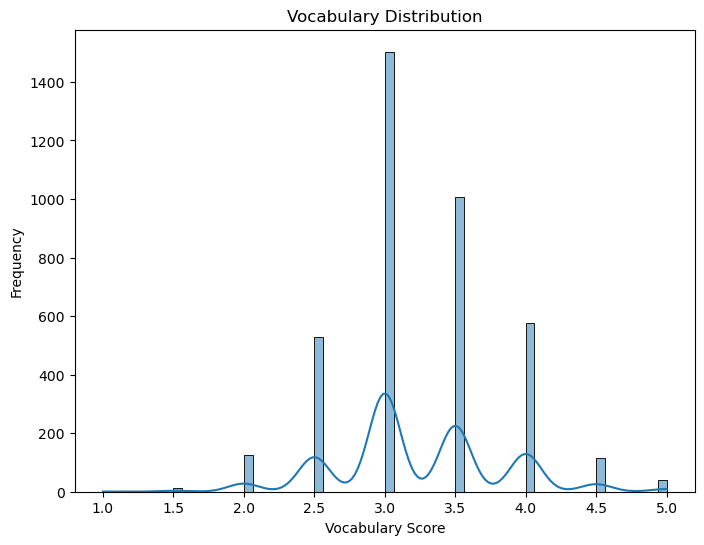

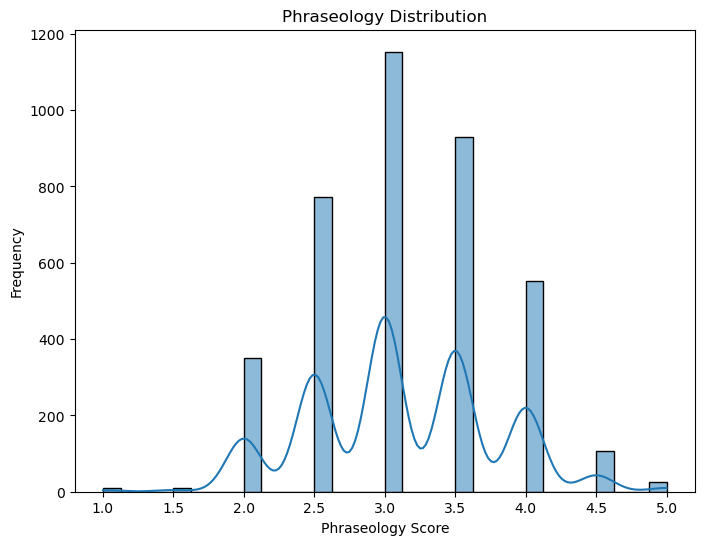

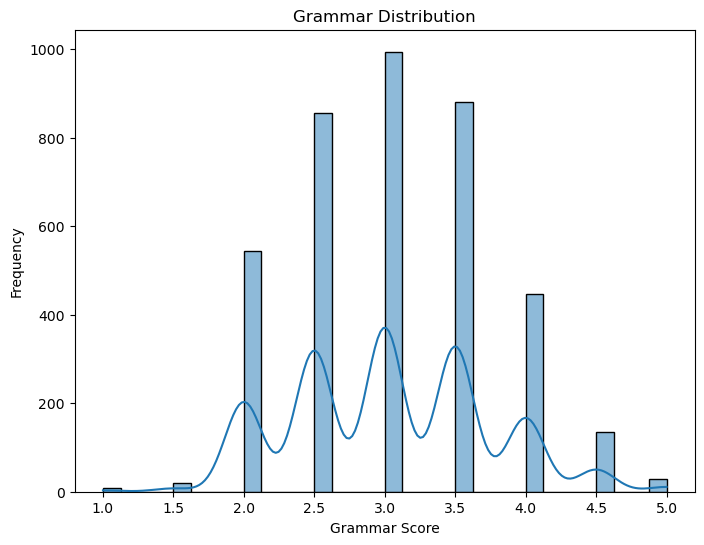

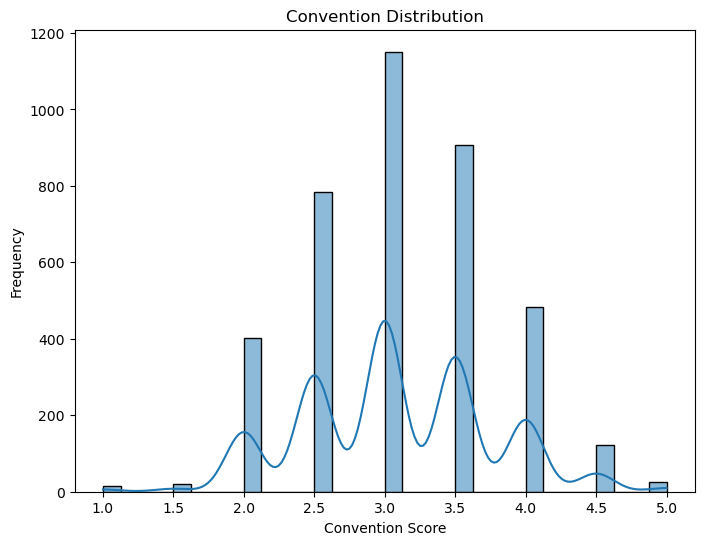

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/feedback-prize-english-language-learning/train.csv")

# Distribution of cohesion
plt.figure(figsize=(8, 6))
sns.histplot(data["cohesion"], kde=True)
plt.title("Cohesion Distribution")
plt.xlabel("Cohesion Score")
plt.ylabel("Frequency")
plt.show()

# Distribution of syntax
plt.figure(figsize=(8, 6))
sns.histplot(data["syntax"], kde=True)
plt.title("Syntax Distribution")
plt.xlabel("Syntax Score")
plt.ylabel("Frequency")
plt.show()

# Distribution of vocabulary
plt.figure(figsize=(8, 6))
sns.histplot(data["vocabulary"], kde=True)
plt.title("Vocabulary Distribution")
plt.xlabel("Vocabulary Score")
plt.ylabel("Frequency")
plt.show()

# Distribution of phraseology
plt.figure(figsize=(8, 6))
sns.histplot(data["phraseology"], kde=True)
plt.title("Phraseology Distribution")
plt.xlabel("Phraseology Score")
plt.ylabel("Frequency")
plt.show()

# Distribution of grammar
plt.figure(figsize=(8, 6))
sns.histplot(data["grammar"], kde=True)
plt.title("Grammar Distribution")
plt.xlabel("Grammar Score")
plt.ylabel("Frequency")
plt.show()

# Distribution of convention
plt.figure(figsize=(8, 6))
sns.histplot(data["conventions"], kde=True)
plt.title("Convention Distribution")
plt.xlabel("Convention Score")
plt.ylabel("Frequency")
plt.show()


In [18]:
train

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,think students would benefit learning homebeca...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,problem change let best matter happening chang...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,dear principalif u change school policy grade ...,3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,best time life become agree greatest accomplis...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,small act kindness impact people change people...,2.5,3.0,3.0,3.0,2.5,2.5
...,...,...,...,...,...,...,...,...
3906,FFD29828A873,believe using cellphones class education us go...,2.5,3.0,3.0,3.5,2.5,2.5
3907,FFD9A83B0849,working alone students argue decission proyect...,4.0,4.0,4.0,4.0,3.5,3.0
3908,FFDC4011AC9C,problem chance best think quote cant best ever...,2.5,3.0,3.0,3.0,3.5,3.0
3909,FFE16D704B16,many people disagree albert schweitzers quote ...,4.0,4.5,4.5,4.0,4.5,4.5


In [19]:
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Attention

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [20]:
train_essays, val_essays, train_scores, val_scores = train_test_split(train['full_text'],
                                                                      train[['cohesion', 'syntax', 'vocabulary',
                                                                                  'phraseology', 'grammar', 'conventions']],
                                                                      test_size=0.2,
                                                                      random_state=42)


In [21]:
# Train Word2Vec model
embedding_dim = 100
word2vec_model = Word2Vec(sentences=train_essays, vector_size=embedding_dim, min_count=1)

# Convert essays to word embeddings
train_embeddings = [np.mean([word2vec_model.wv[word] for word in essay], axis=0) for essay in train_essays]
val_embeddings = [np.mean([word2vec_model.wv[word] for word in essay], axis=0) for essay in val_essays]


In [22]:
len(train_embeddings)

3128

In [23]:
len(word2vec_model.wv.key_to_index)

27

In [24]:
vocabulary_size = len(word2vec_model.wv.key_to_index)
print("Vocabulary Size:", vocabulary_size)

# Check word embeddings shape
embedding_shape = word2vec_model.wv.vectors.shape
print("Embedding Shape:", embedding_shape)

Vocabulary Size: 27
Embedding Shape: (27, 100)


In [25]:
!pip install tensorflow-addons

In [26]:
import tensorflow_addons as tfa

/opt/conda/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [27]:
# # # Prepare the deep learning model
# # model = Sequential()
# # model.add(Embedding(input_dim=len(word2vec_model.wv.key_to_index),
# #                     output_dim=embedding_dim,
# #                     weights=[word2vec_model.wv.vectors],
# #                     input_length=len(train_embeddings[0])))
# # model.add(LSTM(units=128, return_sequences=True))
# # model.add(Attention())
# # model.add(Dense(units=6, activation='linear'))

# # model.compile(optimizer='adam', loss='mean_squared_error')

# # Prepare the deep learning model
# model = Sequential()
# model.add(Embedding(input_dim=vocabulary_size,
#                     output_dim=embedding_dim,
#                     weights=[word2vec_model.wv.vectors],
#                     input_length=len(train_embeddings[0]),
#                     trainable=False))  # Set trainable=False to keep the pre-trained word embeddings fixed
# model.add(LSTM(units=128, return_sequences=True))
# model.add(tfa.layers.Attention())
# model.add(Dense(units=6, activation='linear'))

# model.compile(optimizer='adam', loss='mean_squared_error')

In [28]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Embedding, Input, dot
# Prepare the deep learning model
input_dim = len(train_embeddings[0])
inputs = Input(shape=(input_dim,))
embedding_layer = Embedding(input_dim=vocabulary_size ,
                            output_dim=embedding_dim,
                            weights=[word2vec_model.wv.vectors],
                            input_length=input_dim,
                            trainable=False)(inputs)
lstm_layer = LSTM(units=128, return_sequences=True)(embedding_layer)

# Custom Attention Layer
attention_weights = dot([lstm_layer, lstm_layer], axes=[2, 2])
attention_weights = Dense(units=input_dim, activation='softmax')(attention_weights)
context_vector = dot([attention_weights, lstm_layer], axes=[2, 1])
attention_output = LSTM(units=128)(context_vector)

output_layer = Dense(units=6, activation='linear')(attention_output)

model = Model(inputs=inputs, outputs=output_layer)
model.compile(optimizer='adam', loss='mean_squared_error')

In [29]:
# Train the model
model.fit(np.array(train_embeddings), np.array(train_scores), epochs=10, validation_data=(np.array(val_embeddings), np.array(val_scores)))


Epoch 1/10
98/98 [==============================] - 31s 265ms/step - loss: 0.7822 - val_loss: 0.4356
Epoch 2/10
98/98 [==============================] - 25s 253ms/step - loss: 0.4338 - val_loss: 0.4285
Epoch 3/10
98/98 [==============================] - 25s 254ms/step - loss: 0.4383 - val_loss: 0.4358
Epoch 4/10
98/98 [==============================] - 25s 254ms/step - loss: 0.4340 - val_loss: 0.4340
Epoch 5/10
98/98 [==============================] - 25s 251ms/step - loss: 0.4398 - val_loss: 0.4319
Epoch 6/10
98/98 [==============================] - 25s 254ms/step - loss: 0.4368 - val_loss: 0.4381
Epoch 7/10
98/98 [==============================] - 25s 256ms/step - loss: 0.4345 - val_loss: 0.4305
Epoch 8/10
98/98 [==============================] - 25s 256ms/step - loss: 0.4346 - val_loss: 0.4280
Epoch 9/10
98/98 [==============================] - 24s 250ms/step - loss: 0.4316 - val_loss: 0.4315
Epoch 10/10
98/98 [==============================] - 25s 254ms/step - loss: 0.4314 - val_lo

In [30]:
test_embeddings = [np.mean([word2vec_model.wv[word] for word in essay if word in word2vec_model.wv],
                           axis=0) for essay in test['full_text']]

# Predict scores for test data
test_scores = model.predict(np.array(test_embeddings))



1/1 [==============================] - 1s 938ms/step


In [31]:
# Create submission file
submission_df = pd.DataFrame(test_scores, columns=['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions'])
submission_df.insert(0, 'text_id', test['text_id'])

In [32]:
submission_df

,text_id,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0000C359D63E,3.09546,2.983478,3.177864,3.052969,3.009933,3.006909
1,000BAD50D026,3.09546,2.983478,3.177864,3.052969,3.009933,3.006909
2,00367BB2546B,3.09546,2.983478,3.177865,3.052969,3.009933,3.006909


In [33]:
submission_df.to_csv('submission.csv', index=False)